<h2 align='center'>  Regresión Logística </h2> 

## Grafica

In [1]:
import numpy as np
from matplotlib import pyplot as plt

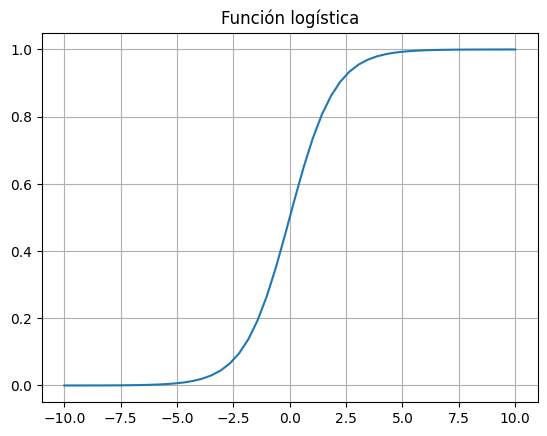

In [2]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title('Función logística')
plt.grid()
plt.axis
plt.show()

## Tipos de modelos de Regresión Logística

* **Regresión Logística Binaria:** la variable objetivo tiene solo dos resultados posible, Llueve o NO Llueve, Sube o Baja.
* **Regresión Logística Multinomial:** la variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.
* **Regresión Logística Ordinal:** la variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto del 1 al 5

# Jugar con BDD

In [3]:
import pandas as pd

In [17]:
#dataframe = pd.read_csv('../bdd/usuarios_win_mac_lin.csv')
dataframe = pd.read_excel('../../bdd/bdd_acv2.xlsx')

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Dataset

In [18]:
dataframe.head(10)

,Code,Localization,Severity,SEX,Age,Cardiac FQ,Systolic BP,Diastolic BP,Glucose,Hb A/C %,...,RANKIN admission,NIHSS dismissed,RANKIN dismissed,NIHSS 6 months,RANKIN 6 months,PROGNOSIS,VEGF/mL,PLGF/mL,IL-6 (pg/ml),exosomas
0,1,TACI,Major,1,53,78,162,64,137.09,5.9,...,5,42,6,2,6,Bad,448.22265,71.993015,18.586835,NaN
1,2,TIA,Mild,1,54,56,130,89,136.00,6.5,...,5,0,2,0,2,Good,302.91950,122.437550,1.263441,NaN
2,3,LACI,Mild,2,78,91,152,75,359.42,13.8,...,3,2,1,2,2,Missing,284.52795,127.826050,49.091862,3.337500e+10
3,4,LACI,Mild,2,87,59,136,86,186.20,5.9,...,4,0,2,0,2,Good,428.41470,108.966435,96.544126,NaN
4,5,POCI,Major,1,69,104,154,95,170.00,16.7,...,4,2,1,0,1,Good,221.23940,117.647850,43.309864,1.349900e+10
5,6,PACI,Major,2,90,55,216,84,160.95,12.3,...,4,1,5,1,2,Good,165.52390,128.574450,4.897850,1.781250e+10
6,8,POCI,Major,1,90,78,180,80,123.00,5.6,...,5,8,4,6,4,Bad,299.13300,138.602950,13.519904,NaN
7,11,POCI,Major,1,55,68,121,66,136.00,13.4,...,3,3,1,0,0,Good,168.76940,173.627850,0.528827,2.142500e+10
8,12,TACI,Major,2,83,64,177,92,113.80,14.2,...,5,10,5,8,4,Bad,355.38945,123.185950,2.114048,1.250000e+10
9,14,PACI,Major,2,70,59,120,60,216.61,13.8,...,3,1,0,2,1,Good,131.98635,157.013500,52.680689,2.331250e+10


In [19]:
#dataframe.iloc[-1] # Última fila

In [20]:
#columnas = ['PCR','INR', 'TTPK', 'Tiempo protombina', 'Functional outcome numérico'] # Columnas a trabajar
columnasMuestra = ['SEX', 'Age','TRIGLICERIDOS', 'Platelets', 'PROGNOSIS'] # Columnas a trabajar 'Severity',, 'Diastolic BP', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission'
dataframeMuestra = dataframe[[*columnasMuestra]]
dataframeMuestra.head(5)

,SEX,Age,TRIGLICERIDOS,Platelets,PROGNOSIS
0,1,53,130,267,Bad
1,1,54,130,159,Good
2,2,78,97,161,Missing
3,2,87,133,242,Good
4,1,69,137,259,Good


### Numero de Clase

In [22]:
print(dataframe.groupby('PROGNOSIS').size())

PROGNOSIS
Bad        15
Good       26
Miss        1
Missing     3
dtype: int64


### Distribucion respecto a la clase

C:\Users\Abraham\AppData\Local\Temp\ipykernel_13400\3777903449.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframeMuestra.drop(['PROGNOSIS'],1).hist()


<Figure size 100x100 with 0 Axes>

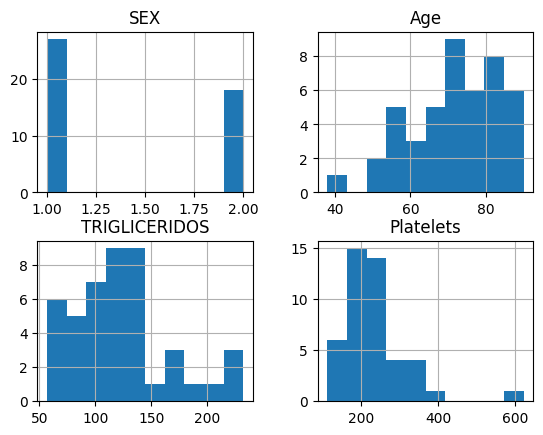

In [23]:
plt.figure(figsize=(10,10), dpi=10)
dataframeMuestra.drop(['PROGNOSIS'],1).hist()
plt.show()

# Funciona para pocas columnas, pero es util para ver como estan respecto a la columna tomada.

# Modelo

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #separa las metricas
from sklearn import metrics

In [25]:
columnas = ['SEX', 'Age', 'Cardiac FQ', 'Systolic BP', 'Diastolic BP', 'Glucose', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'K (potassium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission', 'NIHSS admission', 'RANKIN admission', 'NIHSS dismissed', 'RANKIN dismissed', 'NIHSS 6 months', 'RANKIN 6 months', 'PROGNOSIS', 'VEGF/mL', 'PLGF/mL', 'IL-6 (pg/ml)'] #  'Localization', 'Severity'
dataset = dataframe[[*columnas]]

In [26]:
modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=8000)

In [27]:
X = dataset.drop('PROGNOSIS',axis=1)

In [28]:
Y = dataset['PROGNOSIS']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.80, random_state=1)

In [30]:
modelo_RL.fit(X_train,y_train)

ValueError: could not convert string to float: 'indeterminado '

## Prediccion

In [18]:
prediccion = modelo_RL.predict(X_test)

## Evaluacion del Modelo

In [19]:
print("Matriz de Confusión :\n",metrics.confusion_matrix(y_test, prediccion))
# Para saber los aciertos que tiene

Matriz de Confusión :
 [[1 0 0]
 [1 6 0]
 [1 0 0]]


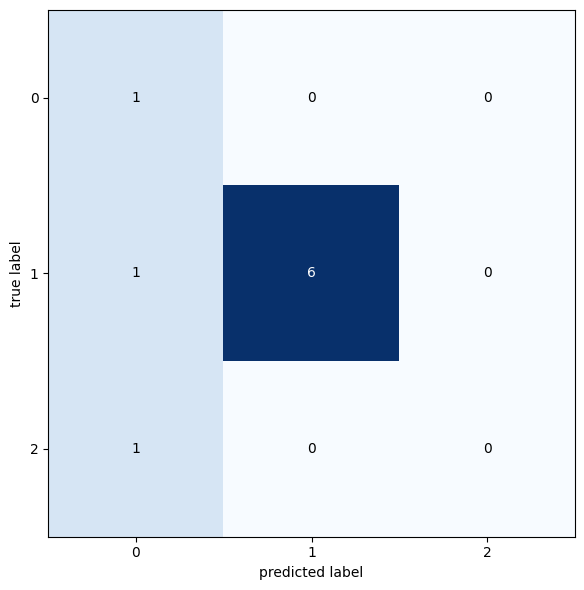

In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, prediccion)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [21]:
print("Tasa de acierto: {:4f}".format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.777778


In [22]:
print('Reporte de clasificacion:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificacion:

              precision    recall  f1-score   support

         Bad       0.33      1.00      0.50         1
        Good       1.00      0.86      0.92         7
     Missing       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.62      0.47         9
weighted avg       0.81      0.78      0.77         9



C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Hasta aqui

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar los datos requeridos</li>
    <li>2-. Adquirir los datos en un formato accesible</li>
    <li>3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preparar los datos para el modelo de aprendizaje automático</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
    <li>8-. Reducción de caracteristicas, si el modelo no fue satisfactorio</li>
    <li>9-. Interpretación el modelo y reporte los resultados visual y numéricamente</li>
</ul>

# 2-. Adquisición de datos
Primero, necesitamos algunos datos. Para usar un ejemplo realista, recuperé datos de pacientes del Hospital Herminda Martin de Chillan. En general, aproximadamente el 80 % del tiempo dedicado al análisis de datos es limpiar y recuperar datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad.

In [1]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/dataframe.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2012418042,11998898,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2000149601,12002852,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,98085992,12003092,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9772094,11995391,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,98095110,12014450,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [2]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 44 pacientes con 85 variables.


# 3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario

En este item, la base de datos será rellenada.

In [4]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'EDAD','TRIGLICERIDOS', 'PESO', 'TALLA', 'FC', 'GLUCOSA', 'Hb A/C  %', 'COL. TOTAL', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'VCM', 'HCM', 'VHS', 'PLAQUETAS', 'INR', 'CONTEO G.B.', 'P.C.R', 'Nitrogeno Ureico', 'Uremia', 'Creatinina', 'TTPA', 'TP', 'NA', 'K', 'CL', 'Fosfatasa Alcalina', 'Gamma glutamil', 'Transaminasa piruvica', 'Trans oxal', 'GLASGOW AL INICO ACV', 'NIHSS_INICO_ACV', 'RANKIN INICIO ACV', 'NIHSS alta ACV', 'RANKIN alta ACV', 'NIHSS 6M', 'RANKIN 6M']
dataset = dataframe[[*columnasMuestra]]

# Para los datos fallecidos y NaN realizamos la impuntación y manejo de datos a través del promedio
dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)

valores_por_defecto = {'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'EDAD':dataset["EDAD"].mean(),
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(), 
                       'PESO':dataset["PESO"].mean(),
                       'TALLA':dataset["TALLA"].mean(),
                       'FC':dataset["FC"].mean(),
                       'GLUCOSA':dataset["GLUCOSA"].mean(),
                       'Hb A/C  %':dataset["Hb A/C  %"].mean(), 
                       'COL. TOTAL':dataset["COL. TOTAL"].mean(), 
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(),
                       'LDL':dataset["LDL"].mean(), 
                       'HDL':dataset["HDL"].mean(),
                       'HCTO':dataset["HCTO"].mean(), 
                       'HB':dataset["HB"].mean(),
                       'VCM':dataset["VCM"].mean(),
                       'HCM':dataset["HCM"].mean(), 
                       'VHS':dataset["VHS"].mean(),
                       'PLAQUETAS':dataset["PLAQUETAS"].mean(),
                       'INR':dataset["INR"].mean(),
                       'CONTEO G.B.':dataset["CONTEO G.B."].mean(),
                       'P.C.R':dataset["P.C.R"].mean(),
                       'Nitrogeno Ureico':dataset["Nitrogeno Ureico"].mean(),
                       'Uremia':dataset["Uremia"].mean(),
                       'Creatinina':dataset["Creatinina"].mean(), 
                       'TTPA':dataset["TTPA"].mean(),
                       'TP':dataset["TP"].mean(), 
                       'NA':dataset["NA"].mean(), 
                       'K':dataset["K"].mean(),
                       'CL':dataset["CL"].mean(),
                       'Fosfatasa Alcalina':dataset["Fosfatasa Alcalina"].mean(),
                       'Gamma glutamil':dataset["Gamma glutamil"].mean(), 
                       'Transaminasa piruvica':dataset["Transaminasa piruvica"].mean(),
                       'Trans oxal':dataset["Trans oxal"].mean(), 
                       'GLASGOW AL INICO ACV':dataset["GLASGOW AL INICO ACV"].mean(),
                       'NIHSS_INICO_ACV':dataset["NIHSS_INICO_ACV"].mean().round(), 
                       'RANKIN INICIO ACV':dataset["RANKIN INICIO ACV"].mean(), 
                       'NIHSS alta ACV':dataset["NIHSS alta ACV"].mean(), 
                       'RANKIN alta ACV':dataset["RANKIN alta ACV"].mean(), 
                       'NIHSS 6M':dataset["NIHSS 6M"].mean(), 
                       'RANKIN 6M':dataset["RANKIN 6M"].mean()
                      }

dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

C:\Users\Abraham\AppData\Local\Temp\ipykernel_1909660\2763670976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
C:\Users\Abraham\AppData\Local\Temp\ipykernel_1909660\2763670976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)


,HTA,DIABETES,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,...,Gamma glutamil,Transaminasa piruvica,Trans oxal,GLASGOW AL INICO ACV,NIHSS_INICO_ACV,RANKIN INICIO ACV,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M
0,DESCONOCIDO,DESCONOCIDO,53.0,130.0,78.25,164.25,78.416667,137.090000,5.9,268.0,...,41.660000,20.39000,25.51,11.0,14.0,5.0,42.0,6.0,0.000000,6.000000
1,si,si,54.0,130.0,88.00,165.00,56.000000,136.732703,6.5,187.0,...,39.527317,27.22425,27.34,15.0,6.0,5.0,0.0,2.0,0.000000,2.000000
2,si,si,78.0,97.0,78.25,164.25,91.000000,359.420000,13.8,159.0,...,130.390000,49.57000,23.40,15.0,5.0,3.0,2.0,1.0,2.052632,2.526316
3,si,si,87.0,133.0,52.50,164.25,59.000000,186.200000,5.9,193.0,...,33.950000,15.59000,22.93,15.0,1.0,4.0,0.0,2.0,0.000000,2.000000
4,si,si,69.0,137.0,94.00,164.25,104.000000,170.000000,16.7,184.0,...,39.527317,27.22425,27.34,15.0,3.0,4.0,2.0,1.0,0.000000,1.000000


In [5]:
round(dataset.describe(), 2)

,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,TRIGLICERIDOS,LDL,...,Gamma glutamil,Transaminasa piruvica,Trans oxal,GLASGOW AL INICO ACV,NIHSS_INICO_ACV,RANKIN INICIO ACV,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,...,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,71.69,122.97,78.25,164.25,78.42,136.73,8.98,162.46,122.97,95.46,...,39.53,27.22,27.34,13.97,5.66,3.64,5.69,2.37,2.05,2.53
std,12.00,44.34,9.13,1.30,16.32,50.51,3.37,49.86,44.34,45.11,...,23.75,18.70,16.64,1.45,4.31,1.38,9.75,1.78,4.38,2.05
min,38.00,57.00,52.50,158.00,40.00,82.61,4.80,85.00,57.00,18.00,...,11.61,10.27,10.52,8.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,64.25,91.50,78.25,164.25,67.75,101.17,5.90,120.50,91.50,63.50,...,24.94,15.90,19.32,13.97,3.00,3.00,0.00,1.00,0.00,1.00
50%,71.85,122.97,78.25,164.25,78.42,130.59,8.98,162.46,122.97,95.46,...,33.11,21.88,23.60,13.98,5.00,4.00,2.00,2.00,0.00,2.00
75%,80.50,137.00,78.25,164.25,90.00,161.17,11.00,184.75,137.00,114.25,...,42.33,29.39,27.45,15.00,6.00,5.00,5.69,4.00,2.05,4.00
max,90.00,232.00,110.00,170.00,126.00,359.42,16.70,342.00,232.00,254.00,...,130.39,105.36,104.42,15.00,21.00,5.00,42.00,6.00,25.00,6.00


### Número de clase

In [6]:
print(dataframe.groupby('NIHSS_INICO_ACV').size())

NIHSS_INICO_ACV
0.0     1
1.0     3
2.0     6
3.0     3
4.0     7
5.0     4
6.0     4
7.0     4
10.0    1
13.0    1
14.0    1
15.0    1
16.0    1
21.0    1
dtype: int64


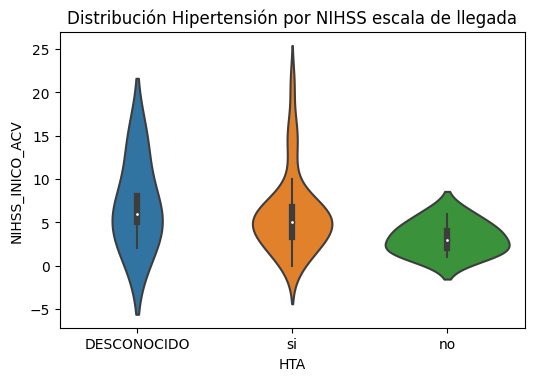

In [17]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'HTA',
        y     = 'NIHSS_INICO_ACV',
        data  = dataset,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución Hipertensión por NIHSS escala de llegada');

C:\Users\Abraham\AppData\Local\Temp\ipykernel_1909660\3489633589.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframeMuestra.drop(['NIHSS_INICO_ACV'],1).hist()


<Figure size 100x100 with 0 Axes>

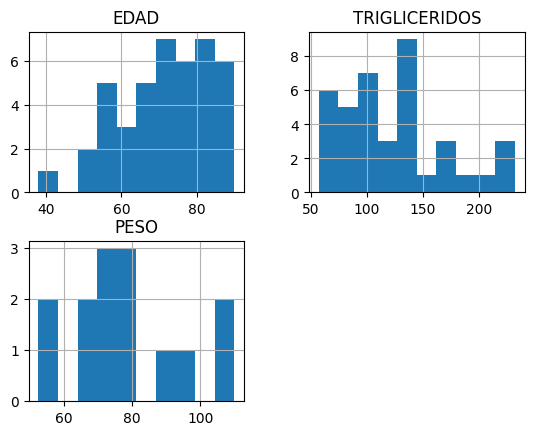

In [27]:
# Muestra
columnasMuestra = ['HTA', 'DIABETES', 'EDAD','TRIGLICERIDOS', 'PESO', 'NIHSS_INICO_ACV']
dataframeMuestra = dataframe[[*columnasMuestra]]



plt.figure(figsize=(10,10), dpi=10)
dataframeMuestra.drop(['NIHSS_INICO_ACV'],1).hist()
plt.show()

# Funciona para pocas columnas, pero es util para ver como estan respecto a la columna tomada.

# 4-. Preparar los datos para el modelo de aprendizaje automático
## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

##### Codificación One-Hot

El primer paso para nosotros se conoce como codificación one-hotde los datos Este proceso toma variables categóricas, como Diabetes, y las convierte en una representación numérica sin un orden arbitrario

In [29]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)

dataset.head(5)

# Lista de características para uso posterior
features = dataset.drop('NIHSS_INICO_ACV', axis = 1)
feature_list = list(features.columns)

# 5-. Entrenar el modelo en los datos de entrenamiento

In [96]:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_INICO_ACV', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_INICO_ACV']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

### Creamos el modelo y entrenamos

In [102]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #separa las metricas
from sklearn import metrics

# Creamos el modelo de Arbol de Decisión (y configuramos el número máximo de nodos-hoja)
lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# 6-. Predicciones sobre los datos de prueba
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [111]:
# Predicción Entrenamiento 
prediccionEntreno = lr.predict(X_train)

# Predicción Tests
prediccionTests = lr.predict(X_test)

### Generamos métricas para evaluar el modelo

## Fase de Entrenamiento

In [112]:
from sklearn import metrics

print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, prediccionEntreno))

Entrenamiento - Accuracy : 1.0


### Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

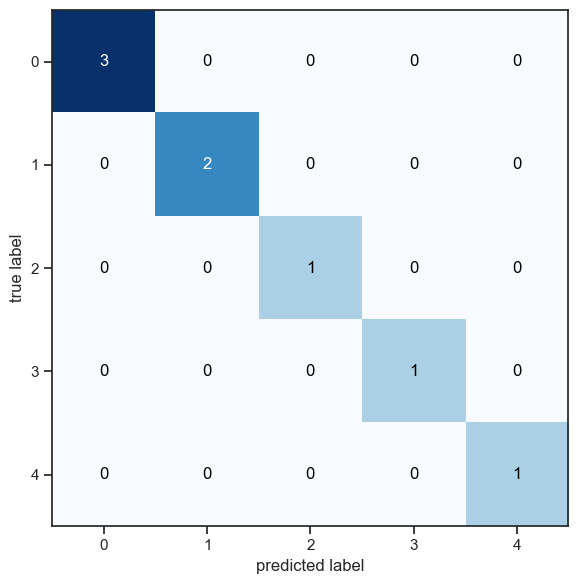

In [114]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

In [115]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento

Una vez entrenado el modelo, se pueden predecir nuevas observaciones.

## Fase de validación  (Usando datos de Test)

In [116]:
print("Promedio - Accuracy :", metrics.accuracy_score(y_test, prediccionTests))

Promedio - Accuracy : 0.08333333333333333


### Matriz de Confusión

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


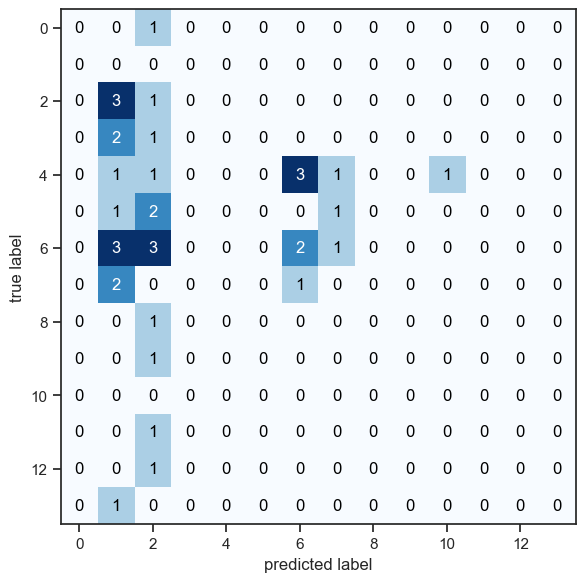

In [117]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [118]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.25      0.12         4
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         4
         6.0       0.33      0.22      0.27         9
         7.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1

    accuracy                           0.08        36
   macro avg       0.03      0.03      0.03        36
weighted avg       0.09      0.08    

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [121]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = lr.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = lr.classes_)
predicciones.head(3)

,1.0,2.0,6.0,7.0,14.0
0,0.009780,0.974804,0.000037,2.030868e-08,0.015378
1,0.317201,0.680830,0.000296,1.030523e-05,0.001662
2,0.050474,0.949229,0.000112,3.773621e-06,0.000181
